<a href="https://colab.research.google.com/github/JoyAssis/womakerscode_dataAnalitics_projeto_final/blob/main/Evolu%C3%A7%C3%A3o_do_C%C3%A2ncer_Mary_Jackson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

# Importando a base de dados

In [ ]:
df = pd.read_csv('global_cancer_patients_2015_2024.csv')
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [ ]:
df.shape

(50000, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [ ]:
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country_Region,0
Year,0
Genetic_Risk,0
Air_Pollution,0
Alcohol_Use,0
Smoking,0
Obesity_Level,0


In [ ]:
# Antes do tratamento
tabela = pd.crosstab(df['Cancer_Type'], df['Gender'])
print(tabela)

Gender       Female  Male  Other
Cancer_Type                     
Breast         2051  2080   2058
Cervical       2160  2028   2034
Colon          2108  2147   2121
Leukemia       2081  2092   2093
Liver          2064  2091   2094
Lung           2067  2103   1989
Prostate       2113  2138   2057
Skin           2065  2117   2049


In [ ]:
#Excluir registros incoerentes (câncer de próstata em mulheres)
df = df[~((df['Cancer_Type'] == 'Prostate') & (df['Gender'] == 'Female'))]

#Excluir registros incoerentes (câncer de colo de útero em homens)
df = df[~((df['Cancer_Type'] == 'Cervical') & (df['Gender'] == 'Male'))]

Tratamento de dados de câncer de mama em homens, reduzindo a incidência para números mais coerentes com a realidade, conforme literatura:

Américas Amigas: https://www.americasamigas.org.br/blog/cancer-de-mama-em-homens?gad_source=1&gad_campaignid=1662651260&gbraid=0AAAAADgMHAwo93wCiLf_jibVcFcAGEqoa&gclid=CjwKCAjwvuLDBhAOEiwAPtF0VoD8EdXbgEAVplx01OzAUsUGl3baVP5VMPlPGTiTiEJYYHHluRTybhoCMSIQAvD_BwE


A.C.Camargo: https://accamargo.org.br/sobre-o-cancer/noticias/cancer-de-mama-em-homens-fique-atento


Gov.br: https://www.gov.br/saude/pt-br/assuntos/noticias/2022/outubro/brasil-registrou-207-obitos-de-homens-por-cancer-de-mama-em-2020


In [ ]:
#Tratamento do Câncer de Mama do homens (Normalização para 1% dos casos)
mama_homens = df[(df['Cancer_Type'] == 'Breast') & (df['Gender'] == 'Male')]
num_mama_homens_validos = int(0.01 * len(df[df['Cancer_Type'] == 'Breast']))
mama_homens_amostrados = mama_homens.sample(n=num_mama_homens_validos, random_state=42)
df = df[~((df['Cancer_Type'] == 'Breast') & (df['Gender'] == 'Male'))]
df = pd.concat([df, mama_homens_amostrados], ignore_index=True)

In [ ]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
3,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
4,PT0000008,21,Male,USA,2022,4.3,3.8,1.0,0.3,8.5,Lung,Stage II,56458.48,6.5,3.36


# 1. Análise Exploratória (EDA)


### Identificar os países com maior número de casos.


In [ ]:
qt_paises = df['Country_Region'].value_counts().reset_index(name='Incidencia')
qt_paises

,Country_Region,Incidencia
0,Australia,4502
1,USA,4460
2,Germany,4420
3,UK,4406
4,Russia,4401
5,India,4386
6,Brazil,4378
7,Pakistan,4340
8,China,4279
9,Canada,4268


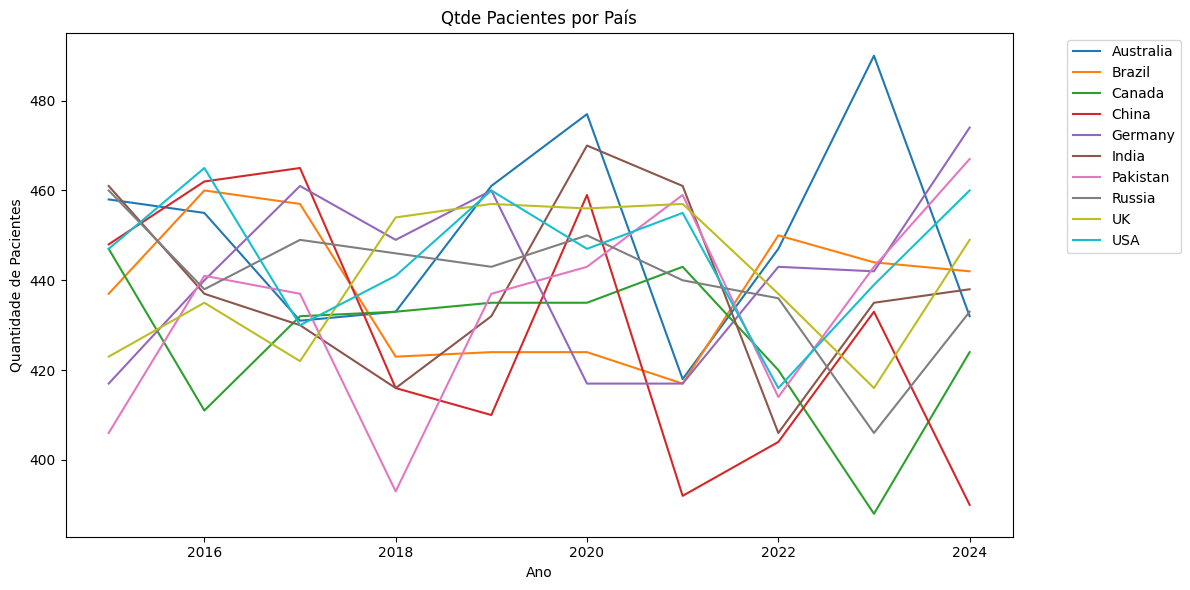

In [ ]:
df_ano_pais = df.groupby(['Year', 'Country_Region']).size().reset_index(name='Incidencia')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ano_pais, x='Year', y='Incidencia', hue='Country_Region')
plt.title('Qtde Pacientes por País')
plt.ylabel('Quantidade de Pacientes')
plt.xlabel('Ano')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-42-3771994481.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




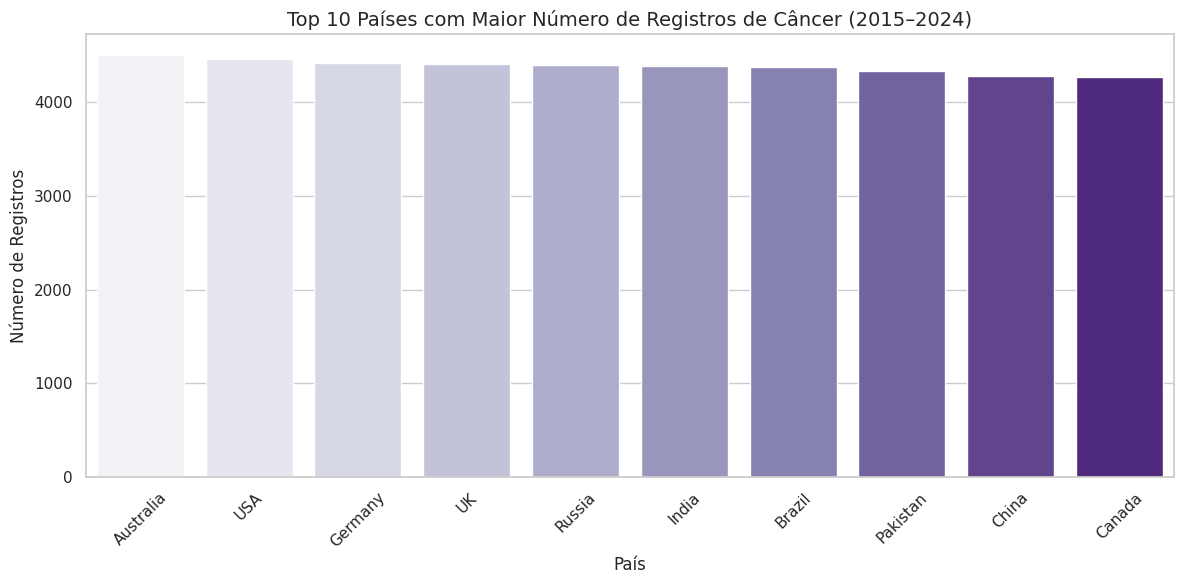

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=qt_paises, x='Country_Region', y='Incidencia', palette='Purples')

plt.title('Top 10 Países com Maior Número de Registros de Câncer (2015–2024)', fontsize=14)
plt.xlabel('País')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Avaliar evolução temporal (2015–2024) da incidência

In [ ]:
qt_pacientes_ano = df['Year'].value_counts().sort_index()
qt_pacientes_ano

,count
Year,
2015,4404
2016,4444
2017,4414
2018,4304
2019,4419
2020,4478
2021,4359
2022,4273
2023,4336


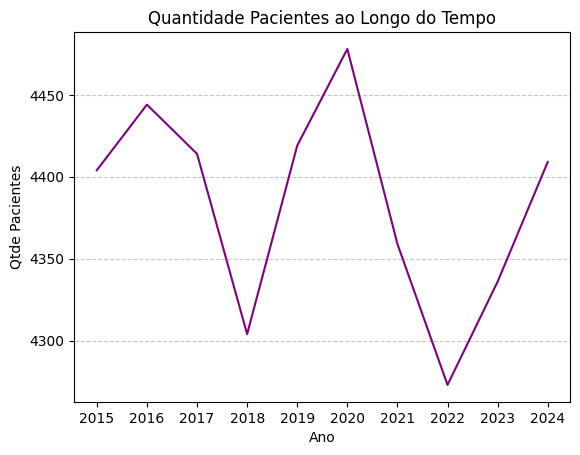

In [ ]:
plt.plot(qt_pacientes_ano.index, qt_pacientes_ano.values, color = 'purple')
plt.xlabel('Ano')
plt.ylabel('Qtde Pacientes')
plt.title('Quantidade Pacientes ao Longo do Tempo')
plt.xticks(qt_pacientes_ano.index)  # Garante que todos os anos apareçam no eixo X
# plt.xticks(rotation=45)  # Rotaciona os valores do eixo X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Analisar diferenças por gênero, idade ou tipo de câncer (se disponível)

In [ ]:
qt_genero = df['Gender'].value_counts()
df['Gender'].value_counts(normalize=True) * 100

,proportion
Gender,
Other,37.625456
Female,33.293796
Male,29.080748


In [ ]:
(df['Age'].value_counts(normalize=True) * 100).sort_index()

,proportion
Age,
20,1.393704
21,1.448449
22,1.437044
23,1.462135
24,1.434763
...,...
85,1.414234
86,1.439325
87,1.475821


In [ ]:
qt_idade = (df['Age'].value_counts()).sort_index()
qt_idade

,count
Age,
20,611
21,635
22,630
23,641
24,629
...,...
85,620
86,631
87,647


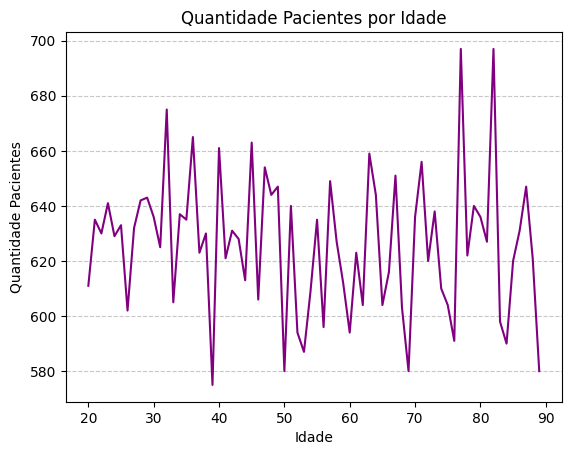

In [ ]:
plt.plot(qt_idade.index, qt_idade.values, color = 'purple')
plt.xlabel('Idade')
plt.ylabel('Quantidade Pacientes')
plt.title('Quantidade Pacientes por Idade')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Idade em Faixa Etária**

In [ ]:
# Definindo as faixas etárias
bins = [20, 29, 39, 49, 59, 69, 79, 89]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Agrupando as idades nas faixas
df['faixa-etaria'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Contando quantas pessoas estão em cada faixa
contagem_por_faixa = df['faixa-etaria'].value_counts().sort_index()

print(contagem_por_faixa)

# Contagem por faixa
contagem = df['faixa-etaria'].value_counts().sort_index()

# Soma total de pessoas
total = contagem.sum()

# Exibir
print(f'\nTotal de pessoas: {total}')

faixa-etaria
20-29    6298
30-39    6306
40-49    6368
50-59    6129
60-69    6178
70-79    6314
80-89    6247
Name: count, dtype: int64

Total de pessoas: 43840


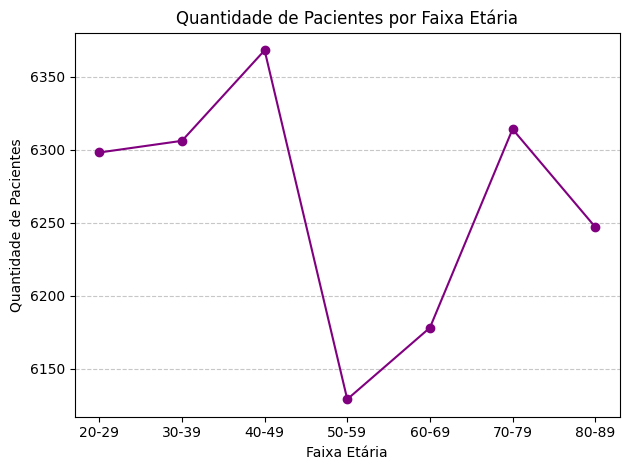

In [ ]:
import matplotlib.pyplot as plt

# Plotando o gráfico com base em contagem_por_faixa
plt.plot(contagem_por_faixa.index, contagem_por_faixa.values, color='purple', marker='o')

plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Pacientes')
plt.title('Quantidade de Pacientes por Faixa Etária')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


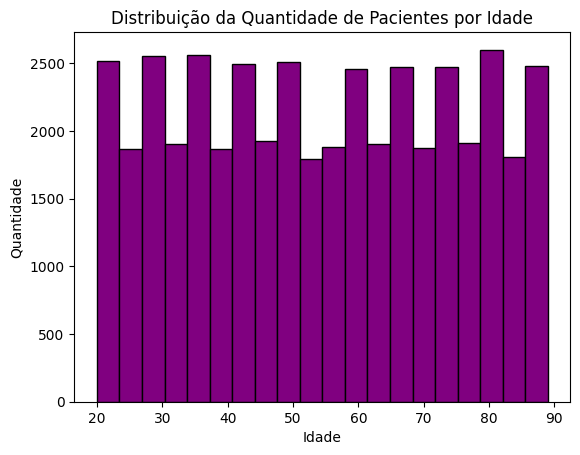

In [ ]:
plt.hist(df['Age'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Distribuição da Quantidade de Pacientes por Idade')
plt.show()

In [ ]:
qt_tipo_cancer =  df['Cancer_Type'].value_counts()
qt_tipo_cancer

,count
Cancer_Type,
Colon,6376
Leukemia,6266
Liver,6249
Skin,6231
Lung,6159
Prostate,4195
Cervical,4194
Breast,4170


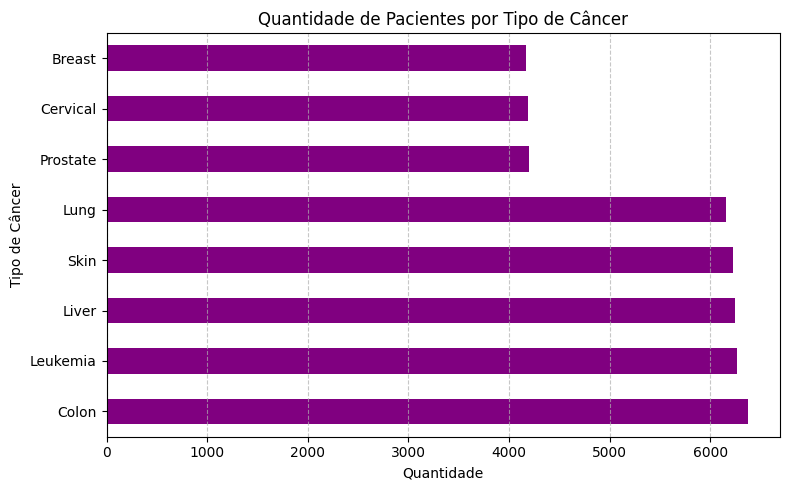

In [ ]:
plt.figure(figsize=(8, 5))
qt_tipo_cancer.plot(kind='barh', color='purple')
plt.title('Quantidade de Pacientes por Tipo de Câncer')
plt.xlabel('Quantidade')
plt.ylabel('Tipo de Câncer')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Detectar possíveis outliers ou anomalias nos dados.


In [ ]:
df[['Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']].describe()

,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,43840.000000,43840.000000,43840.000000
mean,52493.349240,5.003935,4.951433
std,27378.543038,2.881943,1.200055
min,5000.050000,0.000000,0.900000
25%,28675.175000,2.500000,4.120000
50%,52494.820000,5.000000,4.950000
75%,76293.697500,7.500000,5.790000
max,99999.840000,10.000000,9.160000


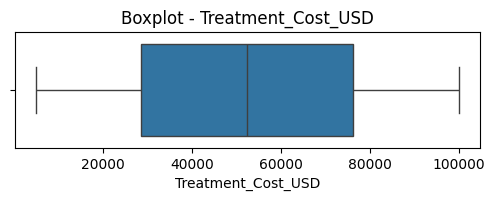

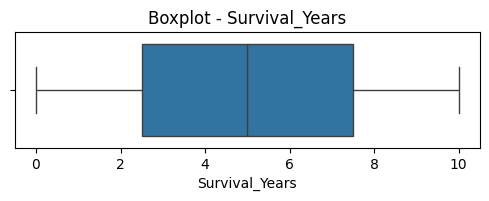

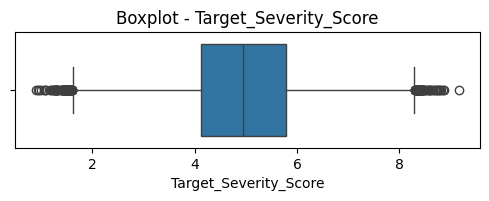

In [ ]:
variaveis = ['Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']

for var in variaveis:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot - {var}')
    plt.show()

# 2. Visualizações


### Mapas de calor globais com incidência por país e ano.


In [ ]:
df_pais_ano_group = df.groupby(['Country_Region', 'Year']).size().reset_index(name='Incidencia')
df_pais_ano_group

,Country_Region,Year,Incidencia
0,Australia,2015,458
1,Australia,2016,455
2,Australia,2017,431
3,Australia,2018,433
4,Australia,2019,461
...,...,...,...
95,USA,2020,447
96,USA,2021,455
97,USA,2022,416
98,USA,2023,439


In [ ]:
fig = px.choropleth(
    df_pais_ano_group,
    locations='Country_Region',
    locationmode='country names',
    color='Incidencia',
    hover_name='Country_Region',
    animation_frame='Year',
    color_continuous_scale='Reds',  # Viridis, Plasma, Blues etc.
    title='Incidência de Pacientes por País e Ano'
)

fig.show()

### Séries temporais por país ou continente.


In [ ]:
df['Country_Region'].unique()

array(['UK', 'China', 'Brazil', 'USA', 'Canada', 'Germany', 'India',
       'Australia', 'Russia', 'Pakistan'], dtype=object)

In [ ]:
def identificar_continente(pais):
    if pais in ['Brazil', 'Canada', 'USA']:
        return 'América'
    elif pais in ['Germany', 'UK', 'Russia']:
        return 'Europa'
    elif pais in ['China', 'Pakistan', 'India']:
        return 'Ásia'
    elif pais == 'Australia':
        return 'Oceania'
    else:
        return 'Outro'

df['continente'] = df['Country_Region'].apply(identificar_continente)

In [ ]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,faixa-etaria,continente
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,70-79,Europa
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,30-39,Ásia
2,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,40-49,Europa
3,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,40-49,América
4,PT0000008,21,Male,USA,2022,4.3,3.8,1.0,0.3,8.5,Lung,Stage II,56458.48,6.5,3.36,20-29,América


In [ ]:
df_continente_ano_group = df.groupby(['continente', 'Year']).size().reset_index(name='Incidencia')
df_continente_ano_group.head()

,continente,Year,Incidencia
0,América,2015,1331
1,América,2016,1336
2,América,2017,1319
3,América,2018,1297
4,América,2019,1319


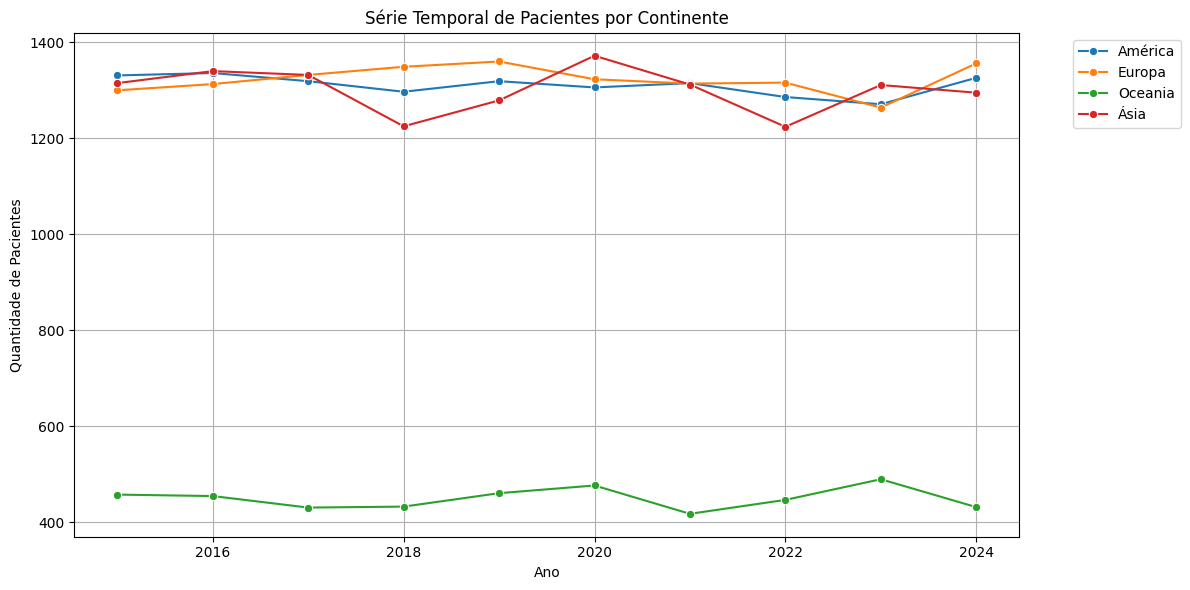

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_continente_ano_group, x='Year', y='Incidencia', hue='continente', marker='o')
plt.title('Série Temporal de Pacientes por Continente')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Pacientes')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # legenda fora do gráfico
plt.tight_layout()
plt.show()

In [ ]:
df['inicio_ano'] = pd.to_datetime(df['Year'].astype(str) + '-01-01')
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,faixa-etaria,continente,inicio_ano
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,70-79,Europa,2021-01-01
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,30-39,Ásia,2021-01-01
2,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,40-49,Europa,2015-01-01
3,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,40-49,América,2017-01-01
4,PT0000008,21,Male,USA,2022,4.3,3.8,1.0,0.3,8.5,Lung,Stage II,56458.48,6.5,3.36,20-29,América,2022-01-01


In [ ]:
df_continente_data_group = df.groupby(['continente', 'inicio_ano']).size().reset_index(name='Incidencia')
# df_continente_data_group

df_america = df_continente_data_group[df_continente_data_group['continente'] == 'América'].set_index('inicio_ano')
df_america.head()

,continente,Incidencia
inicio_ano,,
2015-01-01,América,1331
2016-01-01,América,1336
2017-01-01,América,1319
2018-01-01,América,1297
2019-01-01,América,1319


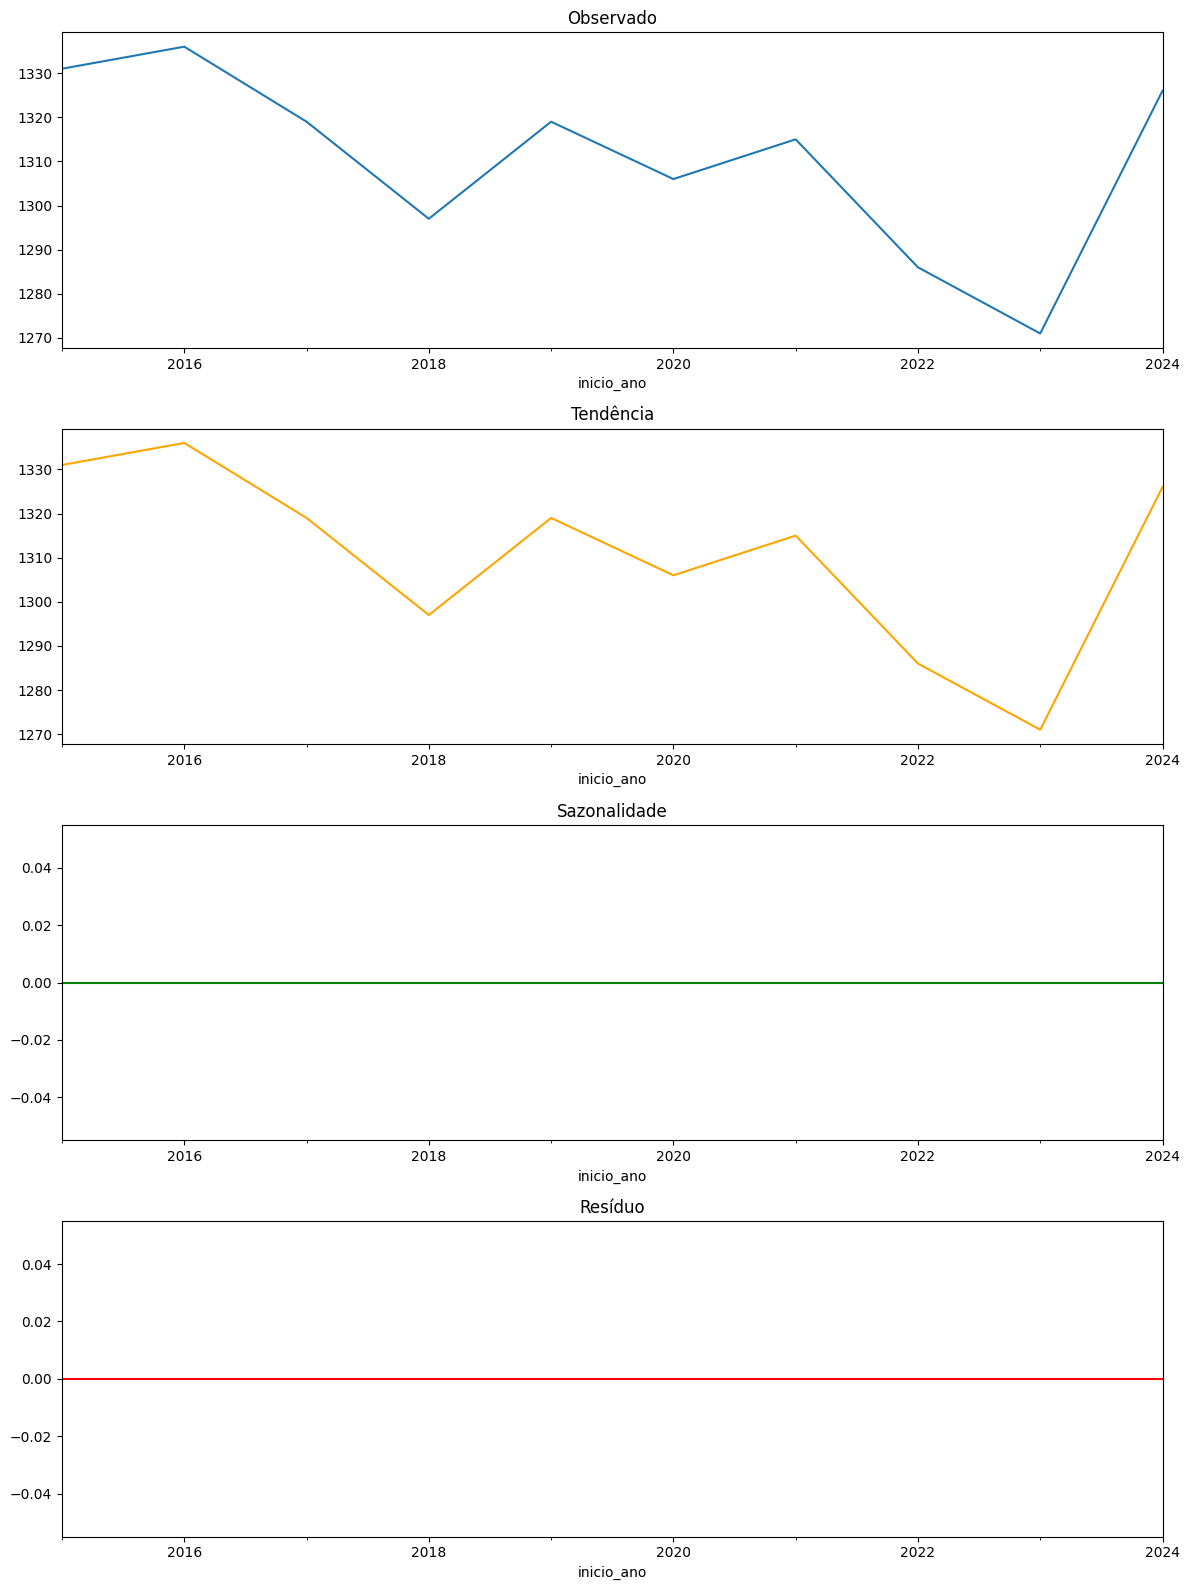

In [ ]:
decomposition = seasonal_decompose(df_america['Incidencia'], model='additive') ######### Fazendo a análise de série temporal apenas pro continente Americano

# Plotar os componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observado')
decomposition.trend.plot(ax=ax2, color='orange')
ax2.set_title('Tendência')
decomposition.seasonal.plot(ax=ax3, color='green')
ax3.set_title('Sazonalidade')
decomposition.resid.plot(ax=ax4, color='red')
ax4.set_title('Resíduo')
plt.tight_layout()
plt.show()

Na série temporal não foi possível identificar sazonalidade ou resíduo pois no data frame não existe dados detalhados o suficiente de data para permitir esse tipo de análise.

###  Gráficos comparativos entre homens e mulheres.

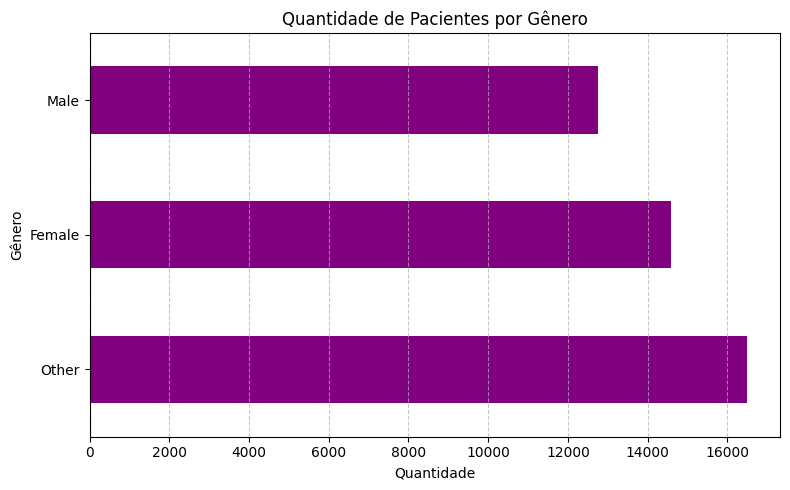

In [ ]:
plt.figure(figsize=(8, 5))
qt_genero.plot(kind='barh', color='purple')
plt.title('Quantidade de Pacientes por Gênero')
plt.xlabel('Quantidade')
plt.ylabel('Gênero')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Modelagem Preditiva

###  Prever o número de casos em 2025 com base na evolução histórica usando regressão linear ou modelos de séries temporais.


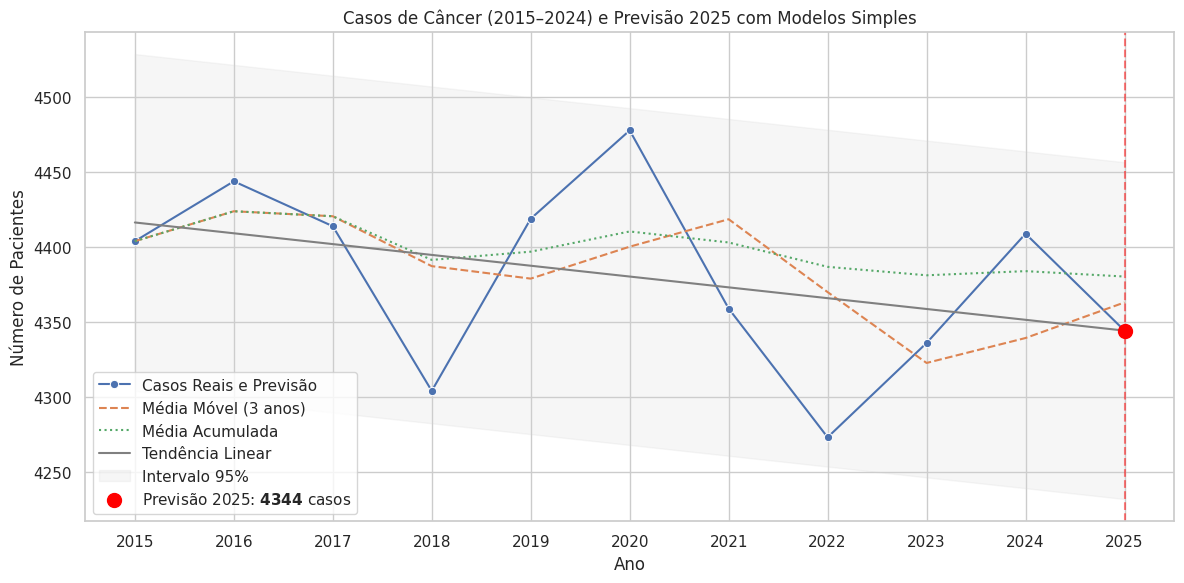

In [ ]:
# Configurações visuais
sns.set(style='whitegrid')

# Df com coluna 'Year' com anos entre 2015 e 2024
qt_pacientes_ano = df['Year'].value_counts().sort_index()
qt_pacientes_ano = qt_pacientes_ano.reindex(range(2015, 2025), fill_value=0)

# Criar dataframe para modelagem
df_modelo = pd.DataFrame({
    'Ano': qt_pacientes_ano.index,
    'Casos': qt_pacientes_ano.values
})

# Separar dados para regressão linear
X = df_modelo['Ano'].values.reshape(-1, 1)
y = df_modelo['Casos'].values

# Treinar modelo de tendência linear
modelo = LinearRegression()
modelo.fit(X, y)

# Prever 2025
previsao_2025 = modelo.predict([[2025]])[0]

# Adicionar previsão ao dataframe
df_modelo.loc[len(df_modelo)] = [2025, previsao_2025]

# Calcular médias
df_modelo['Rolling_Mean'] = df_modelo['Casos'].rolling(window=3, min_periods=1).mean()
df_modelo['Expanding_Mean'] = df_modelo['Casos'].expanding().mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Ano', y='Casos', data=df_modelo, marker='o', label='Casos Reais e Previsão')
sns.lineplot(x='Ano', y='Rolling_Mean', data=df_modelo, linestyle='--', label='Média Móvel (3 anos)')
sns.lineplot(x='Ano', y='Expanding_Mean', data=df_modelo, linestyle=':', label='Média Acumulada')

# Recriar linha de tendência até 2025 com intervalo de confiança manual
anos_plot = np.arange(2015, 2026).reshape(-1, 1)  # Inclui 2025
casos_pred = modelo.predict(anos_plot)

# Calcular erro padrão simples (só pra visualização)
residuos = y - modelo.predict(X)
std = residuos.std()
conf_int = 1.96 * std  # 95% de confiança

plt.plot(anos_plot.flatten(), casos_pred, color='gray', label='Tendência Linear', linestyle='-')  # Linha manual
plt.fill_between(anos_plot.flatten(),
                 casos_pred - conf_int,
                 casos_pred + conf_int,
                 color='lightgray', alpha=0.2, label='Intervalo 95%')  # Faixa de confiança manual

# Destacar previsão de 2025
plt.axvline(2025, color='red', linestyle='--', alpha=0.5)
plt.scatter(2025, previsao_2025, color='red', s=100, zorder=5, label=f'Previsão 2025: $\\mathbf{{{int(previsao_2025)}}}$ casos')

plt.title('Casos de Câncer (2015–2024) e Previsão 2025 com Modelos Simples')
plt.xlabel('Ano')
plt.ylabel('Número de Pacientes')
plt.xticks(np.arange(2015, 2026))
plt.legend()
plt.tight_layout()
plt.show()

### Qual o impacto das variáveis, analisar e comparar todas.


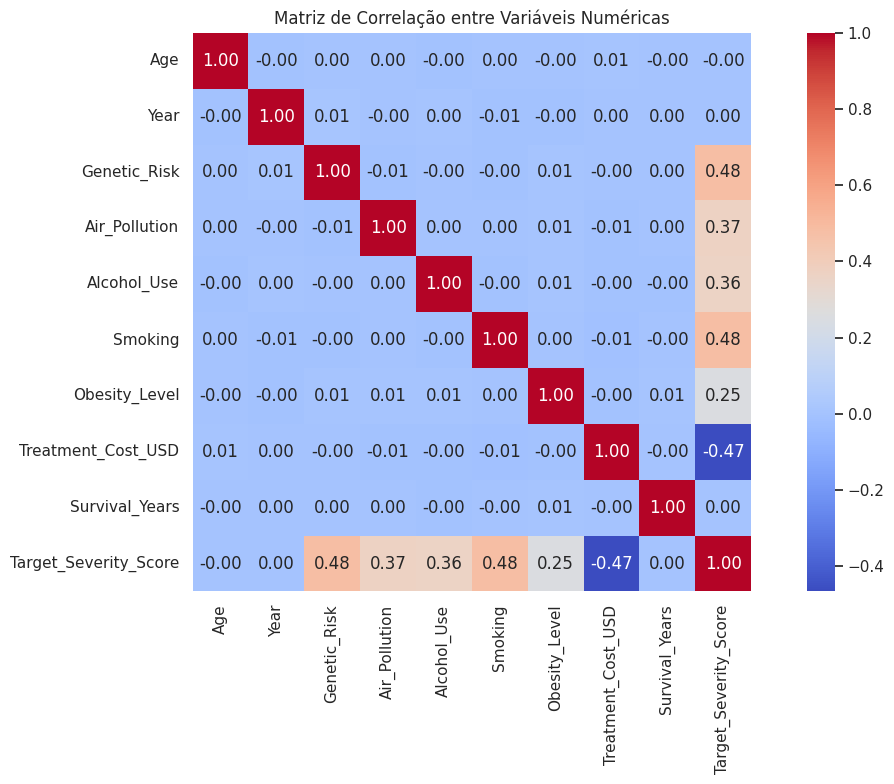

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas para a matriz de correlação
df_num = df.select_dtypes(include=['int64','float64'])

correlation_matrix = df_num.corr()

# Plotar a matriz de correlação com mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()

**Análise do impacto das variáveis (correlações com Target_Severity_Score):**

1. **Genetic_Risk (0.48), Smoking (0.48) e Alcohol_Use (0.36)** apresentam correlações positivas moderadas com a severidade do câncer, sugerindo que quanto maior o risco genético, o consumo de álcool e tabaco, maior a severidade.

2. **Air_Pollution (0.37)** também tem uma correlação positiva moderada, indicando impacto ambiental relevante.

3. **Obesity_Level (0.25)** tem correlação positiva, mas mais fraca, ainda indicando alguma influência.

4. **Treatment_Cost_USD (-0.47)** tem correlação negativa moderada, indicando que maiores custos de tratamento estão associados a menor severidade, possivelmente porque tratamentos mais caros podem estar relacionados a cuidados melhores ou mais intensivos.

5. **Age, Year e Survival_Years** têm correlações próximas de zero, sugerindo pouco ou nenhum impacto linear direto sobre a severidade no dataset analisado.

**Possível conclusão da análise das variáveis:**

1. Variáveis relacionadas a fatores de risco pessoais (genético, tabagismo, álcool) e ambientais (poluição) são os principais impactos positivos na severidade.

2. Custos de tratamento apresentam impacto inverso, podendo ser indicativo de acesso e qualidade do tratamento.

3. Idade e tempo de sobrevivência não mostram impacto linear significativo no escore de severidade neste conjunto.

### Existe diferença significativa entre a incidência de cada tipo de câncer quando comparamos homens e mulheres?


In [ ]:
#Após o tratamento dos dados.
tabela = pd.crosstab(df['Cancer_Type'], df['Gender'])
print(tabela)

Gender       Female  Male  Other
Cancer_Type                     
Breast         2051    61   2058
Cervical       2160     0   2034
Colon          2108  2147   2121
Leukemia       2081  2092   2093
Liver          2064  2091   2094
Lung           2067  2103   1989
Prostate          0  2138   2057
Skin           2065  2117   2049


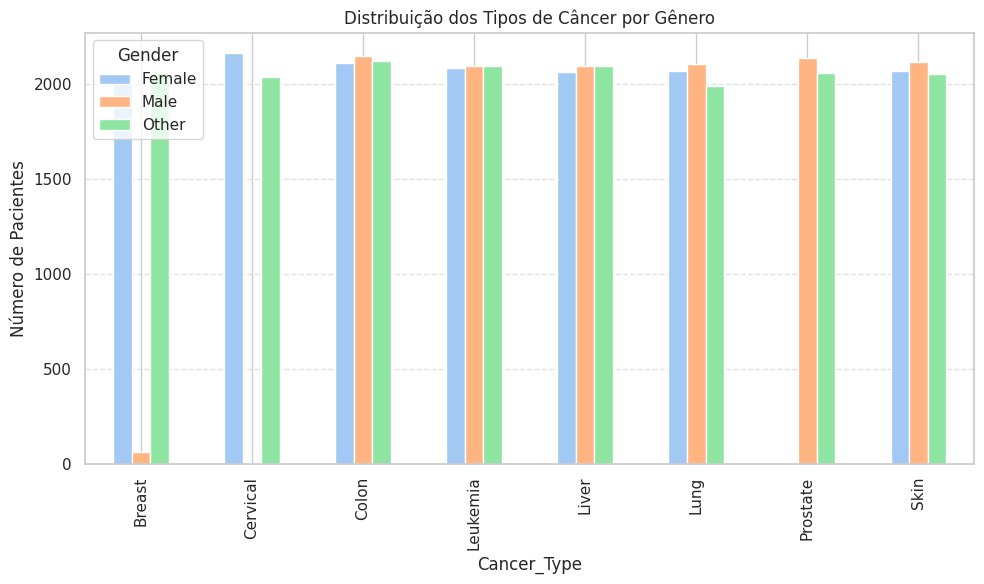

In [ ]:
cores = sns.color_palette("pastel")

tabela.plot(kind='bar', figsize=(10, 6), color=cores)
plt.title('Distribuição dos Tipos de Câncer por Gênero')
plt.ylabel('Número de Pacientes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabela)

print(f'Estatística qui-quadrado: {chi2:.2f}')
print(f'Valor-p: {p:.4f}')

Estatística qui-quadrado: 5971.48
Valor-p: 0.0000


# 4. Proposta de Intervenção

### Com base nas análises, sugerir estratégias de prevenção prioritárias para países ou grupos mais afetados.


Com base nas análises realizadas, observa-se que a **América concentra uma quantidade elevada de casos de câncer**, especialmente em países como EUA e Brasil, ao longo do período de 2015 a 2024.

A **distribuição por gênero é equilibrada**, mas certos tipos de câncer têm maior incidência em um dos sexos, o que r**eforça a necessidade de abordagens específicas**.

A tendência de crescimento anual indica que os **fatores de risco como tabagismo, obesidade, poluição do ar, consumo de álcool e predisposição genética estão tendo um impacto contínuo na elevação dos casos**.

Para os países mais afetados, é urgente **implementar políticas de prevenção** que incluam campanhas antitabagismo mais agressivas, controle da poluição urbana, promoção de alimentação saudável e prática de atividades físicas, além de programas de rastreamento precoce adaptados à realidade local.

O investimento em educação em saúde pública e a ampliação do acesso ao diagnóstico precoce podem reduzir tanto a incidência quanto os custos associados ao tratamento, principalmente nas regiões da América e Ásia, onde há forte correlação entre fatores de risco ambientais e alta taxa de pacientes.